# Practical 1: Text Pre-processing
### Instructor:  Dr. Maryam Movahedifar

<div style="display: flex; justify-content: space-between; align-items: center;">
  <span style="display: flex; align-items: center;">
    <b>Applied Text Mining - University of Bremen - Data Science Center</b>
  </span>
  <div style="display: flex; align-items: center; margin-left: auto;">
    <img src="Uni_Logo.png" alt="Uni Logo" style="width: 100px; margin-right: 10px;">
    <img src="DSC_Logo.png" alt="DSC Logo" style="width: 150px;">
  </div>
</div>


In this practical, we are first going to get acquainted with Python in Jupyter, then we will do some text preprocessing! Are you looking for Python documentation to refresh your knowledge of programming? If so, you can check [Python Documentation](https://docs.python.org/3/reference/).

## Pre-processing Simple Texts
Let's get started!  
Here we are going to introduce **Python** and **Jupyter Notebook** a bit.**.

1. Open **[Jupyter Notebook](https://jupyter.uni-bremen.de)** and create a new empty notebook to work with **Python 3**.

To insert a new code cell below the cell you are currently in, press **`Alt + Enter`**.

To stop your code from running in **Jupyter Notebook**:

- Interrupt execution by clicking the **stop button** or by selecting **`Kernel → Interrupt`**.
- If you want to remove all code in a particular cell, select the cell, press **`Esc`** and then **`D`** twice to delete it.

**Note**: On Mac, use **`cmd`** instead of **`ctrl`** in shortcuts.

Text is also known as a string variable, or as an array of characters. 


1. **Use the `!pip install` command and install the packages: `numpy`, `nltk`, `gensim`, scikit-learn, and `spacy`.**

Generally, you only need to install each package once on your computer and load it again, however, in Jupyter you may need to reinstall a package once you are reconnecting to the network.


In [1]:
!pip install -q scikit-learn -q numpy==1.24.0 gensim==4.3.3 spacy==3.5.1 nltk --upgrade

2. **Create a variable `a` with the text value of `"Hello @Text Mining World! I'm here to learn everything, right?"`, and then print it!**


In [2]:
a = "Hello @Text Mining World! I'm here to learn everything, right?"
a

"Hello @Text Mining World! I'm here to learn everything, right?"

3. **Since this is an array, print the first and last character of your variable.**


In [3]:
print(a[0]) 
print(a[61])
l = len(a)
print("Length of your string is: ", l)
print(a[l-1])

H
?
Length of your string is:  62
?


4. **Import (load) the `nltk` package and use the function `lower()` to convert the characters in string `a` to their lowercase form and save it into a new variable `b`.**

NB: `nltk` comes with many corpora, toy grammars, trained models, etc.

To install the data, after installing `nltk`, you could use the `nltk.download()` data downloader. We will make use of this in **Question 8**.

In [4]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, TreebankWordTokenizer

In [5]:
b = a.lower()
b

"hello @text mining world! i'm here to learn everything, right?"

5. **Use the `string` package to print the list of punctuations.**

Punctuations can separate characters, words, phrases, or sentences. In some applications, they are very important to the task at hand; in others, they are redundant and should be removed!

In [6]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [7]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

6. **Use the punctuation list to remove the punctuations from the lowercase form of our example string `a`. Name your variable `c`.**

In [8]:
# Remember there are many ways to remove punctuations! This is only one of them:
c = "".join([char for char in b if char not in string.punctuation])
print(c)

hello text mining world im here to learn everything right


7. **Use the function `word_tokenize()` from `nltk` and tokenize string `b`. Compare that with the tokenization of string `c`.**

We see that the main difference is in punctuations, however, we also see that some words are now combined together in the tokenization of string `c`.


In [9]:
# Set nltk data path (modify this if needed)
nltk.data.path.append('/home/jovyan/nltk_data')

# Force re-download punkt to ensure it's available
nltk.download('punkt', force=True)

# Try word_tokenize
try:
    print(word_tokenize(b))
    print(word_tokenize(c))
except LookupError:
    print("Error with 'punkt' tokenizer, using TreebankWordTokenizer as fallback.")
    tokenizer = TreebankWordTokenizer()
    print(tokenizer.tokenize(b))
    print(tokenizer.tokenize(c))


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Error with 'punkt' tokenizer, using TreebankWordTokenizer as fallback.
['hello', '@', 'text', 'mining', 'world', '!', 'i', "'m", 'here', 'to', 'learn', 'everything', ',', 'right', '?']
['hello', 'text', 'mining', 'world', 'im', 'here', 'to', 'learn', 'everything', 'right']


8. **Use the function `RegexpTokenizer()` from `nltk` to tokenize the string `b` whilst removing punctuations. This way you will avoid unnecessary concatenations.**

    With this tokenizer, you get similar output as with tokenizing the string `c`.

In [10]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(b)

['hello',
 'text',
 'mining',
 'world',
 'i',
 'm',
 'here',
 'to',
 'learn',
 'everything',
 'right']

Pre-processing a text corpus (dataset)  
Pre-processing a dataset is similar to pre-processing simple text strings. First, we need to get some data. For this, we can use our own dataset, or we can scrape data from the web or use social media APIs. There are also some websites with publicly available datasets:

- CLARIN Resource Families
- UCI Machine Learning Repository
- Kaggle

Here, we want to analyze and pre-process the Taylor Swift song lyrics data from all her albums. The dataset can be downloaded from the course website or alternatively from Kaggle.

Upload `taylor_swift_lyrics.csv` to **Jupyter Notebook**. You can do this by clicking on the Files button on the very left side of Jupyter and drag and drop the data there or click the upload button. Alternatively, you can mount your drive and upload the dataset there.

9. **Read the `taylor_swift.csv` dataset. Check the dataframe using `head()` and `tail()` functions.**

In [11]:
import pandas as pd
ts_lyrics = pd.read_csv("taylor_swift_lyrics.csv")

In [12]:
ts_lyrics.head()

,Artist,Album,Title,Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan..."
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ..."
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca..."
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...


In [13]:
ts_lyrics.tail()

,Artist,Album,Title,Lyrics
127,Taylor Swift,folklore,mad woman,What did you think I'd say to that?\nDoes a sc...
128,Taylor Swift,folklore,epiphany,"Keep your helmet\nKeep your life, son\nJust a ..."
129,Taylor Swift,folklore,betty,"Betty, I won't make assumptions about why you ..."
130,Taylor Swift,folklore,peace,Our coming of age has come and gone\nSuddenly ...
131,Taylor Swift,folklore,hoax,My only one\nMy smoking gun\nMy eclipsed sun\n...


In [14]:
ts_lyrics.iloc[0]

Artist                                         Taylor Swift 
Album                                          Taylor Swift 
Title                                             Tim McGraw
Lyrics     He said the way my blue eyes shinx\nPut those ...
Name: 0, dtype: object

In [15]:
ts_lyrics.head(1)

,Artist,Album,Title,Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...


10. **Add a new column to the dataframe and name it Preprocessed Lyrics , then fill the column with the preprocessed text including the steps in this and the following questions. First replace the \n sequences with a space character.**

In [16]:
import re
def remove_linebreaks(text):
    """custom function to remove the line breaks"""
    return re.sub(r'\n', ' ', text)

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Lyrics"].apply(lambda text: remove_linebreaks(text))
ts_lyrics.head()

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,He said the way my blue eyes shinx Put those G...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...","State the obvious, I didn't get my perfect fan..."
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...","Drew looks at me, I fake a smile so he won't s..."
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...","I don't know what I want, so don't ask me 'Cau..."
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,You have a way of coming easily to me And when...


11. **Write another custom function to remove the punctuations. You can use the previous method or make use of the function maketrans() from the string package.**

In [17]:
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', string.punctuation))

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: remove_punctuation(text))
ts_lyrics.head()

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,He said the way my blue eyes shinx Put those G...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",State the obvious I didnt get my perfect fanta...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",Drew looks at me I fake a smile so he wont see...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",I dont know what I want so dont ask me Cause I...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,You have a way of coming easily to me And when...


12. **Change all the characters to their lower forms. Think about why and when we need this step in our analysis.**

In [18]:
ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].str.lower()
ts_lyrics.head()

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,he said the way my blue eyes shinx put those g...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",state the obvious i didnt get my perfect fanta...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",drew looks at me i fake a smile so he wont see...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",i dont know what i want so dont ask me cause i...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,you have a way of coming easily to me and when...


13. **List the 20 most frequent terms in this dataframe.**

In [19]:
from collections import Counter

# To get all lyrics in one text, you can concatenate all of them using the " ".join(list) syntax,
# which joins all elements in a list separating them by whitespace.
text = " ".join(lyric for lyric in ts_lyrics["Preprocessed Lyrics"])

# split() returns list of all the words in the string
split_it = text.split()

# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)

# most_common() produces k frequently encountered input values and their respective counts.
most_occur = Counter.most_common(20)

print(most_occur)

[('i', 2377), ('you', 2319), ('the', 1623), ('and', 1403), ('me', 885), ('to', 843), ('a', 787), ('in', 686), ('it', 674), ('my', 642), ('of', 492), ('your', 475), ('we', 441), ('that', 436), ('all', 436), ('but', 428), ('like', 406), ('im', 404), ('this', 394), ('know', 380)]


You see that these are mainly stop words. Before removing them let's plot a wordcloud of our data.

14. **Plot a wordcloud with max 50 words using the WordCloud() function from the wordcloud package. Use the command ?WordCloud to check the help for this function.**

In [20]:
!pip install -q wordcloud

In [21]:
from wordcloud import WordCloud
?WordCloud

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

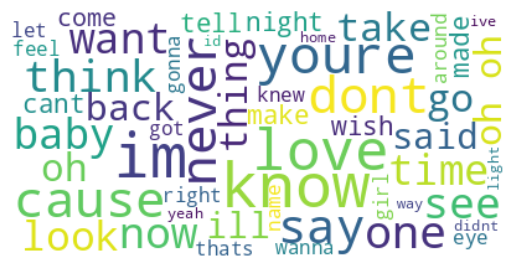

In [22]:
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

15. **Use the English stop word list from the nltk package to remove the stop words. Check the stop words and update them with your optional list of words, for example: "im", "youre", "id", "dont", "cant", "didnt", "ive", "ill", "hasnt". Show the most frequent terms and plot the wordcould of 50 words again.**

In [23]:
from nltk.corpus import stopwords
# run the code nltk.download('stopwords') if needed
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

{"she's", 'been', 'until', "shan't", "won't", "hadn't", 'mightn', 't', "she'd", 'both', 'isn', 's', 'under', 'yourself', 'for', 'between', 'o', "you've", "shouldn't", "i've", 'such', "we've", "you'd", 'against', 'and', 'shouldn', 'when', 'at', 'now', 'in', 'not', "we're", 'there', 'your', 'a', 'had', "it'd", "didn't", 'by', "haven't", 'wouldn', 'whom', 'these', 'the', 'don', 'more', "they'd", 'any', 'own', 'during', 'hadn', 'll', 'only', 'before', "mightn't", 'from', 'he', 'then', 'out', 'having', 'his', 'didn', 'be', 'hers', 'weren', 'y', 'as', 'further', 'which', 'their', 'about', 'its', "she'll", 'through', 'him', 'couldn', "he'd", 'haven', 'has', 'no', 'she', 'some', 've', 'itself', 'was', 'himself', 'of', 'who', "mustn't", 'our', "aren't", 'ours', 'ain', "that'll", 'i', 'how', 'this', 'were', 'yours', 'they', "don't", "doesn't", "i'm", "it's", 'doing', 'should', 'doesn', 'me', 'needn', 'you', 'above', 'down', 'nor', "should've", 'once', "we'd", 'yourselves', 'below', 'd', 'on', 't

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop_words.update(["im", "youre", "id", "dont", "cant", "didnt", "ive", "ill", "hasnt"])
# stop_words.discard('word') # this is when you want to remove a word from the list
print(stop_words)


{"she's", 'been', 'until', "shan't", "won't", "hadn't", 'mightn', 't', "she'd", 'both', 'isn', 's', 'under', 'yourself', 'for', 'between', 'o', "you've", "shouldn't", "i've", 'such', "we've", "you'd", 'against', 'and', 'youre', 'shouldn', 'when', 'at', 'now', 'in', 'not', "we're", 'there', 'your', 'a', 'had', "it'd", "didn't", 'by', "haven't", 'wouldn', 'whom', 'these', 'ill', 'the', 'cant', 'don', 'hasnt', 'more', "they'd", 'any', 'own', 'during', 'hadn', 'll', 'only', 'before', "mightn't", 'from', 'he', 'then', 'out', 'having', 'his', 'didn', 'be', 'hers', 'weren', 'y', 'as', 'further', 'which', 'their', 'about', 'its', "she'll", 'through', 'him', 'couldn', "he'd", 'haven', 'has', 'no', 'she', 'some', 've', 'itself', 'was', 'himself', 'of', 'who', "mustn't", 'our', "aren't", 'ours', 'ain', "that'll", 'i', 'how', 'this', 'were', 'yours', 'they', "don't", "doesn't", "i'm", "it's", 'doing', 'should', 'doesn', 'me', 'needn', 'you', 'above', 'down', 'nor', "should've", 'once', "we'd", 'yo

In [26]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stop_words])

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: remove_stopwords(text))
ts_lyrics.head()

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,said way blue eyes shinx put georgia stars sha...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",state obvious get perfect fantasy realize love...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",drew looks fake smile wont see want need every...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",know want ask cause still trying figure know w...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,way coming easily take take best start fight c...


In [27]:
from collections import Counter

# To get all lyrics in one text, you can concatenate all of them using the " ".join(list) syntax,
# which joins all elements in a list separating them by whitespace.
text = " ".join(lyric for lyric in ts_lyrics["Preprocessed Lyrics"])

# split() returns list of all the words in the string
split_it = text.split()

# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)

# most_common() produces k frequently encountered input values and their respective counts.
most_occur = Counter.most_common(20)

print(most_occur)

[('like', 406), ('know', 380), ('oh', 322), ('never', 294), ('love', 246), ('back', 240), ('time', 224), ('cause', 213), ('one', 177), ('say', 176), ('see', 170), ('got', 159), ('wanna', 158), ('think', 153), ('baby', 153), ('come', 150), ('go', 149), ('want', 142), ('ever', 134), ('could', 133)]


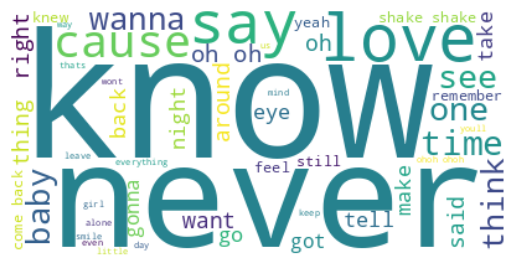

In [28]:
wordcloud = WordCloud(max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

16. **We can apply stemming or lemmatization on our text data. Apply a lemmatizer from nltk and save the results.**

In [29]:
from nltk.stem import WordNetLemmatizer
# run the code nltk.download('wordnet') if needed
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: lemmatize_words(text))
ts_lyrics.head()

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,said way blue eye shinx put georgia star shame...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",state obvious get perfect fantasy realize love...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",drew look fake smile wont see want need everyt...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",know want ask cause still trying figure know w...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,way coming easily take take best start fight c...


In [30]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

And here is the code for stemming:

In [31]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

# since we applied the lemmatization, we don't apply stemming; though you can try it!
# ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: stem_words(text))
# ts_lyrics.head()

The PorterStemmer() is for English language. If we are working with other languages, we can use other stemmers such as the SnowballStemmer() which supports:

In [32]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

<span style="font-size:24px; font-weight: bold;">Vector space and BOW models</span>

17. **Use CountVectorizer() from the sklearn package and build a bag of words model on Preprocessed Lyrics based on term frequency. Check the shape of the output matrix.**

In [33]:
from sklearn.feature_extraction.text import CountVectorizer # for bag of words feature extraction

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.
vectorizer1 = CountVectorizer(max_features = 3000)

# fit_transform() does two functions: First, it fits the model and learns the vocabulary;
# second, it transforms our data into feature vectors.
# The input to fit_transform should be a list of strings.
dtm = vectorizer1.fit_transform(ts_lyrics["Preprocessed Lyrics"])
print(dtm.shape)

(132, 2597)


In [34]:
dtm

<132x2597 sparse matrix of type '<class 'numpy.int64'>'
	with 10530 stored elements in Compressed Sparse Row format>

In [35]:
# we can convert it to a dataframe
dtm_df = dtm.toarray()
dtm_df = pd.DataFrame(dtm_df)
dtm_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
print(dtm_df.shape)

(132, 2597)


18. **Inspect the first 100 terms in the vocabulary.**

In [37]:
# Take a look at the words in the vocabulary
vocab = vectorizer1.get_feature_names_out()
print(vocab[1:100])

['16' '16th' '45' '4am' 'aah' 'abigail' 'absent' 'absurd' 'accent'
 'accident' 'accused' 'ace' 'achilles' 'aching' 'acing' 'across' 'act'
 'acted' 'actress' 'actually' 'add' 'adjusting' 'admit' 'adore'
 'adventure' 'affair' 'afraid' 'afterglow' 'afternoon' 'age' 'ago' 'ah'
 'ahah' 'ahahah' 'ahead' 'ahh' 'aim' 'aint' 'air' 'airplane' 'aisle'
 'album' 'aligned' 'alive' 'alls' 'almost' 'alone' 'along' 'alpha'
 'already' 'alright' 'altar' 'always' 'ambition' 'amen' 'american'
 'americana' 'amnesia' 'amount' 'andi' 'ane' 'angel' 'angry' 'another'
 'answer' 'anthem' 'anther' 'anticipation' 'anybody' 'anymore' 'anyone'
 'anything' 'anyway' 'anywhere' 'apart' 'apartment' 'apology' 'applause'
 'archer' 'architect' 'arent' 'argue' 'arm' 'armor' 'around' 'arrowhead'
 'ash' 'aside' 'ask' 'asked' 'asking' 'asleep' 'assume' 'assumption' 'ate'
 'ateam' 'attached' 'attack' 'attitude']


19. **Using TfidfVectorizer(), you can create a model based on tfidf. Apply this vectorizer to your text data. Does the shape of the output matrix differ from dtm?**

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer2 = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer2.fit_transform(ts_lyrics["Preprocessed Lyrics"])

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(132, 2597)


20. **Use the TfidfVectorizer() to create an n-gram based model with n = 1 and 2. Use the ngram_range argument to determine the lower and upper boundary of the range of n-values for different n-grams to be extracted. (tip: use ?TfidfVectorizer)**

In [39]:
# Create TfidfVectorizer object
vectorizer3 = TfidfVectorizer(ngram_range=(1, 2))

# Generate matrix of word vectors
tfidf_matrix3 = vectorizer3.fit_transform(ts_lyrics["Preprocessed Lyrics"])

# Print the shape of tfidf_matrix
print(tfidf_matrix3.shape)

(132, 15016)


21. **We want to compare the lyrics of Friends theme song with the lyrics of Taylor Swift's songs and find the most similar one. Use the string below. First, apply the pre-processing steps and then transform the text into count and tfidf vectors.
Do the bag of words models agree on the most similar song to Friends theme song?**

In [40]:
friends_theme_lyrics = "So no one told you life was going to be this way. Your job's a joke, you're broke, you're love life's DOA. It's like you're always stuck in second gear, When it hasn\'t been your day, your week, your month, or even your year. But, I\'ll be there for you, when the rain starts to pour. I\'ll be there for you, like I\'ve been there before. I\'ll be there for you, cause you\'re there for me too."
friends_theme_lyrics

"So no one told you life was going to be this way. Your job's a joke, you're broke, you're love life's DOA. It's like you're always stuck in second gear, When it hasn't been your day, your week, your month, or even your year. But, I'll be there for you, when the rain starts to pour. I'll be there for you, like I've been there before. I'll be there for you, cause you're there for me too."

In [41]:
friends_theme_lyrics = remove_punctuation(friends_theme_lyrics)
friends_theme_lyrics = friends_theme_lyrics.lower()
friends_theme_lyrics = remove_stopwords(friends_theme_lyrics)
friends_theme_lyrics = lemmatize_words(friends_theme_lyrics)
friends_theme_lyrics

'one told life going way job joke broke love life doa like always stuck second gear day week month even year rain start pour like cause'

In [42]:
friends_theme_lyrics_tf = vectorizer1.transform([friends_theme_lyrics])
friends_theme_lyrics_tf.shape
dtm.shape

(132, 2597)

In [43]:
friends_theme_lyrics_tf.shape

(1, 2597)

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

# compute and print the cosine similarity matrix
cosine_sim_dtm = cosine_similarity(dtm, friends_theme_lyrics_tf)

print(cosine_sim_dtm)

[[0.07295675]
 [0.05749499]
 [0.05668202]
 [0.099573  ]
 [0.09816136]
 [0.00975761]
 [0.16365771]
 [0.11501093]
 [0.02125256]
 [0.15038123]
 [0.07792865]
 [0.09200874]
 [0.17766726]
 [0.0360492 ]
 [0.0786839 ]
 [0.1062023 ]
 [0.23829304]
 [0.08566568]
 [0.15519271]
 [0.1352231 ]
 [0.03202563]
 [0.19158319]
 [0.09043166]
 [0.19051587]
 [0.10639904]
 [0.12562973]
 [0.13526614]
 [0.1340465 ]
 [0.10332549]
 [0.14529915]
 [0.08091962]
 [0.0428993 ]
 [0.05358677]
 [0.11510231]
 [0.03928371]
 [0.05463417]
 [0.0946985 ]
 [0.0745356 ]
 [0.24685715]
 [0.07198268]
 [0.09507654]
 [0.11511347]
 [0.11136921]
 [0.10401235]
 [0.1946593 ]
 [0.15567091]
 [0.21439196]
 [0.13088543]
 [0.11021668]
 [0.09369712]
 [0.11888042]
 [0.06581261]
 [0.00903711]
 [0.21465394]
 [0.22794562]
 [0.04007421]
 [0.06975801]
 [0.05602768]
 [0.01563873]
 [0.10146346]
 [0.13488377]
 [0.1500909 ]
 [0.0521599 ]
 [0.16455472]
 [0.20490974]
 [0.17563692]
 [0.13237606]
 [0.02857238]
 [0.03055662]
 [0.17989569]
 [0.0790393 ]
 [0.00

In [45]:
import numpy as np
max_index = np.argmax(cosine_sim_dtm, axis=0)
print(cosine_sim_dtm[max_index])
max_index

[[0.24685715]]


array([38])

In [46]:
ts_lyrics.iloc[max_index]

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
38,Taylor Swift,Speak Now,The Story of Us,I used to think one day we'd tell the story of...,used think one day wed tell story u met spark ...


In [47]:
ts_lyrics["Preprocessed Lyrics"].iloc[38]

'used think one day wed tell story u met spark flew instantly people would say theyre lucky one used know place spot next searching room empty seat cause lately even know page oh simple complication miscommunications lead fall many thing wish knew many wall break standing alone crowded room speaking dying know killing like killing yeah know say since twist fate broke story u look lot like tragedy next chapter howd end way see nervously pulling clothes trying look busy best avoid starting think one day tell story u losing mind saw held pride like held oh scared see ending pretending nothing tell miss know never heard silence quite loud standing alone crowded room speaking dying know killing like killing yeah know say since twist fate broke story u look lot like tragedy looking like contest act like care less liked better side battle hand would lay armor youd say youd rather love fight many thing wish knew story u might ending soon standing alone crowded room speaking dying know killing 

## Now you can apply other data set and try the previous steps

In [48]:
friends_theme_lyrics_tfidf = vectorizer3.transform([friends_theme_lyrics])
print(friends_theme_lyrics_tfidf.shape)
print(tfidf_matrix3.shape)
# compute and print the cosine similarity matrix
cosine_sim_tfidf = cosine_similarity(tfidf_matrix3, friends_theme_lyrics_tfidf)

print(cosine_sim_tfidf)

(1, 15016)
(132, 15016)
[[0.02369657]
 [0.01318075]
 [0.01128244]
 [0.03986478]
 [0.03108815]
 [0.00181568]
 [0.02572803]
 [0.02691028]
 [0.00512609]
 [0.04532813]
 [0.01615807]
 [0.00787449]
 [0.03826574]
 [0.0068687 ]
 [0.01320367]
 [0.01245819]
 [0.09768082]
 [0.03284433]
 [0.01891928]
 [0.05104409]
 [0.00801751]
 [0.045455  ]
 [0.02005361]
 [0.04590047]
 [0.0319897 ]
 [0.01850863]
 [0.02299573]
 [0.0238499 ]
 [0.01617267]
 [0.03525199]
 [0.02914826]
 [0.01417113]
 [0.01017535]
 [0.02329621]
 [0.01165122]
 [0.00883778]
 [0.0213434 ]
 [0.01468301]
 [0.052752  ]
 [0.01398688]
 [0.02316361]
 [0.02104993]
 [0.03310764]
 [0.01013489]
 [0.04137598]
 [0.04265813]
 [0.04249053]
 [0.03391019]
 [0.02922056]
 [0.01882679]
 [0.01167784]
 [0.01196412]
 [0.00448242]
 [0.03975051]
 [0.02942139]
 [0.02500672]
 [0.0149794 ]
 [0.01541409]
 [0.00149821]
 [0.01839457]
 [0.03851785]
 [0.02703587]
 [0.01044214]
 [0.01812665]
 [0.04455981]
 [0.03015706]
 [0.03756264]
 [0.00366365]
 [0.00325763]
 [0.033311

In [49]:
max_index = np.argmax(cosine_sim_tfidf, axis=0)
print(cosine_sim_tfidf[max_index])
max_index

[[0.09768082]]


array([16])

In [50]:
ts_lyrics.iloc[max_index]

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
16,Taylor Swift,Fearless,Forever & Always,"Once upon a time, I believe it was a Tuesday w...",upon time believe tuesday caught eye caught on...


In [51]:
ts_lyrics["Preprocessed Lyrics"].iloc[16]

'upon time believe tuesday caught eye caught onto something hold onto night looked eye told loved kidding cause seems thing breaking almost never speak feel welcome anymore baby happened please tell cause one second perfect halfway door stare phone still called feel low feel nothing flashback said forever always oh rain bedroom everything wrong rain rain gone cause said forever always line say something way honest made run hide like scared little boy looked eye thought knew minute sure here everything coming nothing here silence cut core going thought knew minute anymore stare phone still called feel low feel nothing flashback said forever always oh rain bedroom everything wrong rain rain gone cause said forever always mean baby think oh back baby back forget everything back baby back forget everything cause rain bedroom everything wrong rain rain gone cause said forever always oh stare phone still called feel low feel nothing flashback said forever always rain bedroom everything wrong

In [52]:
import pandas as pd
data = pd.read_csv('book_reviews.csv')
# print the first five rows of the dataframe
data.head()

,rating_no,Unnamed: 1,id,age_category,book_genre,rating_no.1,tokenised_text,n_tokens
0,1.0,284434,review_244526687,Adult,Popular fiction - general,1.0,like adult book concept simply ya spoiler exam...,30
1,1.0,30788,review_528067373,Adult,Literary fiction,1.0,okay read college maybe little biased rating l...,21
2,1.0,84989,review_3210428778,Adult,Literary fiction,1.0,remember read book club hating probably chance...,18
3,1.0,61511,review_112612281,Adult,Literary fiction,1.0,yeah star cause know like make like plus depre...,13
4,1.0,112948,review_380001099,Adult,Literary fiction,1.0,assign book brit lit class read email teacher ...,22


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#vectorizer = CountVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(data['tokenised_text'])
y = data['book_genre']

In [54]:
print(y)

0       Popular fiction - general
1                Literary fiction
2                Literary fiction
3                Literary fiction
4                Literary fiction
                  ...            
9995             Literary fiction
9996    Popular fiction - general
9997    Popular fiction - general
9998                  Non fiction
9999                  Non fiction
Name: book_genre, Length: 10000, dtype: object


In [55]:
words = vectorizer.get_feature_names_out()
print(words[:20])

['aa' 'aaaaaaa' 'aaaaaaaahhhhh' 'aaaaah' 'aaaaand' 'aaaahhhhh' 'aaack'
 'aaah' 'aaarrrgggh' 'aagggh' 'aaj' 'ab' 'aback' 'abacus' 'abandon'
 'abandone' 'abandoned' 'abandonment' 'abasement' 'abasment']


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['tokenised_text'])
y = data['book_genre']

In [57]:
print(y)

0       Popular fiction - general
1                Literary fiction
2                Literary fiction
3                Literary fiction
4                Literary fiction
                  ...            
9995             Literary fiction
9996    Popular fiction - general
9997    Popular fiction - general
9998                  Non fiction
9999                  Non fiction
Name: book_genre, Length: 10000, dtype: object


In [58]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.4991

In [59]:
y.value_counts()

book_genre
Literary fiction                   4991
Popular fiction - fantasy          2037
Popular fiction - crime/mystery     951
Popular fiction - historical        901
Popular fiction - general           811
Non fiction                         187
Picturebook                          73
Popular fiction                      23
Popular fiction - biography          15
Folktales                             7
Popular fiction                       4
Name: count, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
import numpy as np
np.random.seed(42)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
model = knn.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
model5 = knn.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=10)
model2 = knn.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=100)
model3 = knn.fit(X_train, y_train)
print('accuracy with 3 neighbours:', model.score(X_test, y_test),
      'accuracy with 5 neighbours:' , model5.score(X_test, y_test),
      '\naccuracy with 10 neighbours:', model2.score(X_test, y_test),
      '\naccuracy with 100 neighbours:', model3.score(X_test, y_test))

accuracy with 3 neighbours: 0.5806060606060606 accuracy with 5 neighbours: 0.6103030303030303 
accuracy with 10 neighbours: 0.6466666666666666 
accuracy with 100 neighbours: 0.6378787878787879


In [62]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=1)
model = nb.fit(X_train, y_train)

nb = MultinomialNB(alpha=10)
model2 = nb.fit(X_train, y_train)
print('accuracy with alpha=1:', model.score(X_test, y_test),
      '\naccuracy with alpha=10:', model2.score(X_test, y_test))

accuracy with alpha=1: 0.5163636363636364 
accuracy with alpha=10: 0.5051515151515151


In [63]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=1.0)
model = svm.fit(X_train, y_train)

svm = LinearSVC(C=0.1)
model2 = svm.fit(X_train, y_train)
print('accuracy with default regularization:', model.score(X_test, y_test),
      '\naccuracy with more regularization:', model2.score(X_test, y_test))

accuracy with default regularization: 0.7145454545454546 
accuracy with more regularization: 0.6809090909090909


In [64]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)
model = tree.fit(X_train, y_train)

tree = DecisionTreeClassifier(max_depth=None)
model2 = tree.fit(X_train, y_train)
print('accuracy with maximum tree depth 5:', model.score(X_test, y_test),
      '\naccuracy with unlimited tree depth:', model2.score(X_test, y_test))

accuracy with maximum tree depth 5: 0.5896969696969697 
accuracy with unlimited tree depth: 0.5281818181818182


In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=3)
model = rfc.fit(X_train, y_train)

rfc = RandomForestClassifier(n_estimators=20)
model2 = rfc.fit(X_train, y_train)
print('accuracy with 3 trees:', model.score(X_test, y_test),
      '\naccuracy with 20 trees:', model2.score(X_test, y_test))

accuracy with 3 trees: 0.5384848484848485 
accuracy with 20 trees: 0.6236363636363637


In [66]:
from sklearn.model_selection import GridSearchCV
# set the search space for grid search. In this case, between 2 and 20 nearest neighbors
parameters = {'n_neighbors': [2,20]}
knn = KNeighborsClassifier()
search = GridSearchCV(knn, parameters)
search.fit(X_train, y_train)
# the best score achieved
print(search.score(X_test, y_test))
# get_params() gives the parameters leading to this best score (in 'estimator')
search.get_params()

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.656969696969697


{'cv': None,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [2, 20]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [67]:
search.best_params_

{'n_neighbors': 20}

In [68]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('knn', knn), ('nb', nb), ('svm', svm), ('tree', tree)])
vc.fit(X_train, y_train)
vc.score(X_test, y_test)

0.6196969696969697